In [1]:
using Plots
using Images
using LinearAlgebra
using StaticArrays
using Interpolations
using ColorSchemes
using Optim
using CSV
using DelimitedFiles
using Printf

include("D:/git/JellyfishGiggles/src/splines.jl")

params_for_profile (generic function with 1 method)

In [2]:
# These are the shapes measured by Costello.
shapeData_Costello = [
[
0.090647482	0.221561043	0.090647482	0.221561043
0.096402878	0.3070171	0.069064748	0.314417411
0.105035971	0.372387115	0.076258993	0.39234301
0.148201439	0.422855284	0.110791367	0.462868298
0.217266187	0.468428473	0.139568345	0.508239037
0.289208633	0.508990998	0.182733813	0.553682079
0.364028777	0.51941723	0.246043165	0.599226348
0.424460432	0.524746032	0.320863309	0.639803333
0.49352518	0.540168468	0.381294964	0.675282889
0.574100719	0.545598496	0.430215827	0.695629225
0.677697842	0.526018582	0.490647482	0.716033404
0.752517986	0.503781497	0.553956835	0.716351542
0.814388489	0.453841148	0.608633094	0.696525794
0.861870504	0.388753118	0.663309353	0.66162467
0.89352518	0.316047865	0.723741007	0.631777593
0.890647482	0.215530892	0.784172662	0.59690539
],
[
1.092086331	0.322070786	1.092086331	0.322070786
1.126618705	0.342344818	1.107913669	0.382451827
1.169784173	0.397838111	1.14676259	0.463049058
1.21294964	0.473431908	1.195683453	0.558772279
1.263309353	0.523936228	1.264748201	0.637008785
1.310791367	0.549300459	1.353956835	0.705296266
1.379856115	0.564722895	1.44028777	0.755981346
1.454676259	0.585199378	1.500719424	0.776385525
1.543884892	0.610773291	1.552517986	0.781670945
1.610071942	0.611105889	1.620143885	0.769447959
1.722302158	0.581519106	1.69352518	0.732128267
1.797122302	0.501493077	1.75971223	0.679697046
1.837410072	0.44139402	1.817266187	0.607121941
1.860431655	0.386233325	1.85323741	0.526900691
1.883453237	0.321022378	1.871942446	0.446592676
1.915107914	0.250829688	1.883453237	0.37629876
1.915107914	0.250829688		1.902158273	0.326141499
1.915107914	0.250829688		1.915107914	0.250829688
],
[
2.237410072	0.232348794	2.237410072	0.232348794
2.231654676	0.347897762	2.205755396	0.347767615
2.223021583	0.448356892	2.197122302	0.468327248
2.243165468	0.54896063	2.202877698	0.573883808
2.274820144	0.604396081	2.231654676	0.674530928
2.335251799	0.670026391	2.271942446	0.745085138
2.381294964	0.690358266	2.322302158	0.798102021
2.438848921	0.720798236	2.385611511	0.856209103
2.530935252	0.731311232	2.454676259	0.894244604
2.6	0.706532663	2.530935252	0.907190629
2.686330935	0.681840859	2.598561151	0.89999277
2.755395683	0.606811034	2.646043165	0.875105745
2.798561151	0.526625935	2.697841727	0.832652471
2.824460432	0.441328947	2.738129496	0.782603666
2.818705036	0.35587289	2.772661871	0.737551065
2.795683453	0.250229565	2.810071942	0.672412422
2.795683453	0.250229565		2.835971223	0.592140559
2.795683453	0.250229565		2.85323741	0.511825314
2.795683453	0.250229565		2.850359712	0.436433968
2.795683453	0.250229565		2.830215827	0.340855356
2.795683453	0.250229565		2.795683453	0.250229565
],
[
0.096402878	-0.788460287	0.096402878	-0.788460287
0.079136691	-0.713170167	0.058992806	-0.718296519
0.096402878	-0.637706518	0.073381295	-0.605158888
0.139568345	-0.567137848	0.125179856	-0.486808141
0.194244604	-0.531687213	0.189928058	-0.416131015
0.269064748	-0.506185604	0.273381295	-0.36043527
0.352517986	-0.485665739	0.348201439	-0.309808033
0.433093525	-0.485260837	0.435971223	-0.269165974
0.539568345	-0.509851415	0.505035971	-0.266306352
0.614388489	-0.534601063	0.571223022	-0.281049131
0.703597122	-0.564303532	0.634532374	-0.323444561
0.795683453	-0.624142294	0.689208633	-0.380958751
0.850359712	-0.684169047	0.741007194	-0.430949713
0.861870504	-0.749437837	0.801438849	-0.488434981
0.867625899	-0.797147609	0.844604317	-0.548519576
0.867625899	-0.797147609		0.870503597	-0.631304002
0.867625899	-0.797147609		0.884892086	-0.716658834
0.867625899	-0.797147609		0.867625899	-0.797147609
],
[
1.060431655	-0.743414916	1.060431655	-0.743414916
1.10647482	-0.718057915	1.092086331	-0.68295434
1.141007194	-0.672658255	1.117985612	-0.622522685
1.178417266	-0.582018004	1.138129496	-0.54201945
1.225899281	-0.508915079	1.175539568	-0.446354073
1.276258993	-0.460923322	1.227338129	-0.365691768
1.330935252	-0.435522938	1.296402878	-0.300018076
1.4	-0.410050251	1.368345324	-0.239355049
1.469064748	-0.404678067	1.460431655	-0.183615921
1.555395683	-0.40173168	1.538129496	-0.173175229
1.644604317	-0.398770833	1.607194245	-0.182878421
1.705035971	-0.408517407	1.670503597	-0.217736163
1.75971223	-0.463519034	1.73381295	-0.277719533
1.797122302	-0.523632551	1.789928058	-0.342764181
1.817266187	-0.588857959	1.824460432	-0.420480098
1.825899281	-0.659166335	1.846043165	-0.503286215
1.84028777	-0.724420664	1.85323741	-0.59872745
1.877697842	-0.769458805	1.857553957	-0.704233397
1.877697842	-0.769458805		1.877697842	-0.769458805
],
[
2.243165468	-0.717371028	2.243165468	-0.717371028
2.246043165	-0.641979683	2.214388489	-0.622038249
2.234532374	-0.55661039	2.2	-0.531658291
2.228776978	-0.461161925	2.194244604	-0.436209826
2.254676259	-0.395705144	2.202877698	-0.350739308
2.297841727	-0.325136474	2.235971223	-0.260120748
2.349640288	-0.279650049	2.289208633	-0.184476339
2.404316547	-0.254249666	2.351079137	-0.12888905
2.473381295	-0.23882723	2.410071942	-0.088391598
2.565467626	-0.24338961	2.482014388	-0.06290445
2.700719424	-0.30301146	2.551079137	-0.062557391
2.752517986	-0.373102925	2.611510791	-0.072303966
2.789928058	-0.453316944	2.66618705	-0.102179965
2.801438849	-0.543711363	2.723741007	-0.157167131
2.784172662	-0.639275514	2.764028777	-0.212241061
2.766906475	-0.72981454	2.807194245	-0.287401034
2.766906475	-0.72981454		2.838848921	-0.372669101
2.766906475	-0.72981454		2.850359712	-0.447988142
2.766906475	-0.72981454		2.844604317	-0.533444199
2.766906475	-0.72981454		2.824460432	-0.608922309
2.766906475	-0.72981454		2.795683453	-0.67439355
2.766906475	-0.72981454		2.766906475	-0.72981454
]
];

# Regress motion and shape parameters

In [3]:
# Bell shape parameters 
# Digitised from Costello plot.

thetas = hcat(
    [0., 0., 0.],
    [0., 0., 0.],
    [0.390, 0.11, 0.37],
    [0.400, 0.731, 0.920],
    [0.950, 1.75, 1.44],
    [2.200, 0.125, 2.100],
)'

lengths = hcat(
    [0.020, 0.013, 0.025],
    [0.040, 0.026, 0.0515],
    [0.12, 0.11, 0.14],
    [0.194, 0.250, 0.194],
    [0.228, 0.179, 0.228],
    [0.250, 0.165, 0.250],
)'

halfThicknesses = hcat(
    [0.097, 0.099, 0.090],
    [0.097, 0.099, 0.090],
    [0.083, 0.102, 0.080],
    [0.063, 0.071, 0.049],
    [0.0335, 0.042, 0.0345],
    [0.011, 0.011, 0.011],
)'

#timeVals = [0, 0.01, 0.2, 0.4, 0.95, 1.0]
# timeVals = [0.04836558, 0.22848566, 0.41027352, 1.39926618, 1.57771848, 1.76617745];
timeVals = [0, 0.13, 0.27];

In [273]:
# Spline control points for regressing the motion of each jellyfish segment.
# We need an implementation compatible with GPUs. This necessitates the
# use of static arrays. 

Nsegments = 6

cps_thetas = SMatrix{Nsegments+1, 7}(vcat([
# t/T values
[0, 0.025, 0.15, 0.25, 0.35, 0.45, 1.0]',
# CP locations
hcat([
    [0., 0.,        0., 0., 0.,       0., 0.],
    [0., 0.,        0., 0., 0.,       0., 0.],
    [0.39, 0.39,        0., 0.38, 0.39,       0.39, 0.39],
    [0.4, 0.4,        0.85, 1.2, 0.41,       0.4, 0.4],
    [0.95, 0.95,        1.95, 1.65, 0.95,       0.95, 0.95],
    [2.2, 2.2,        -1., 2.19, 2.2,       2.2, 2.2],
]...)'
]...));

cps_lengths = SMatrix{Nsegments+1, 7}(vcat([
[0, 0.025, 0.15, 0.25, 0.35, 0.45, 1.0]',
hcat([
    [0.02, 0.02,        0.01, 0.03, 0.022,       0.02, 0.02],
    [0.04, 0.04,        0.02, 0.06, 0.04,       0.04, 0.04],
    [0.12, 0.12,        0.1, 0.155, 0.11,       0.12, 0.12],
    [0.194, 0.194,        0.275, 0.194, 0.194,       0.194, 0.194],
    [0.228, 0.228,        0.16, 0.225, 0.228,       0.228, 0.228],
    [0.250, 0.250,        0.135, 0.245, 0.250,       0.250, 0.250],
]...)'
]...));

cps_halfThicknesses = SMatrix{Nsegments+1, 7}(vcat([
[0, 0.025, 0.15, 0.25, 0.35, 0.45, 1.0]',
hcat([
    [0.097, 0.097,        0.1005, 0.0875, 0.097,       0.097, 0.097],
    [0.097, 0.097,        0.1005, 0.0875, 0.097,       0.097, 0.097],
    [0.083, 0.083,        0.11, 0.075, 0.083,       0.083, 0.083],
    [0.063, 0.063,        0.075, 0.04, 0.063,       0.063, 0.063],
    [0.0335, 0.0335,        0.045, 0.0345, 0.034,       0.0335, 0.0335],
    [0.011, 0.011,        0.011, 0.011, 0.011,       0.011, 0.011],
]...)'
]...));

In [274]:
function smoothShapeParams(i, cps_arr, s)
    # Pick control points from the array and make a spline
    cps_y = cps_arr[[1, i], :]
    pu = old_evaluate_spline(cps_y, s)
    return cps_y, pu
end

color_range = [RGB(get(ColorSchemes.algae, k)) for k in range(0, 1, length=length(tSplineCps))];

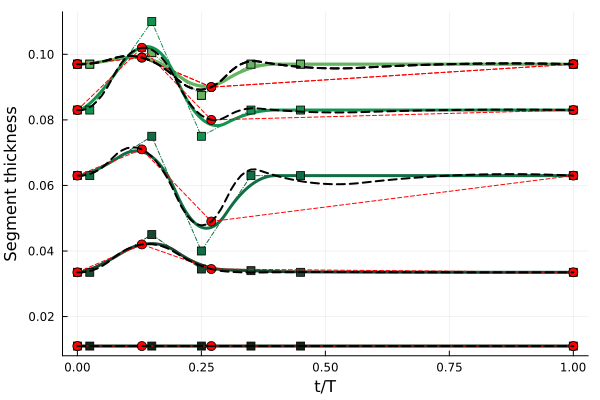

In [275]:
p = plot(dpi=200, xlabel="t/T", ylabel="Segment thickness")
# Ignore the time values in the loop.
for i in 2:size(cps_thetas, 1)
    cps, pu = smoothShapeParams(i, cps_halfThicknesses, 0:0.01:1.0)
    plot!(pu[1, :], pu[2, :], label="", linewidth=3, color=color_range[i])
    plot!(cps[1, :], cps[2, :], linestyle=:dashdot, marker=:square, label="", color=color_range[i])
    plot!(vcat(timeVals, 1.0), vcat(halfThicknesses[i-1, :], halfThicknesses[i-1, 1]),
        linestyle=:dash, marker=:circle, label="", color=:red, markersize=5)
end

for i in 1:6
    filename = @sprintf("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_segment_%d_Costello2020.txt", i-1)
    refData = readdlm(filename)
    plot!(refData[:, 1], refData[:, 3], linewidth=2, color=:black, linestyle=:dash, label="")
end

plot!(show=true)

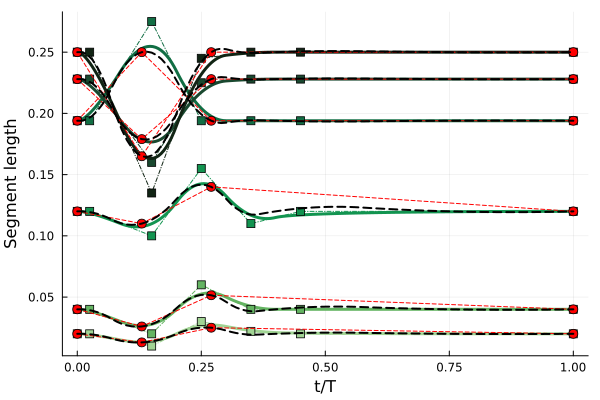

In [276]:
p = plot(dpi=200, xlabel="t/T", ylabel="Segment length")

for i in 2:size(cps_thetas, 1)
    cps, pu = smoothShapeParams(i, cps_lengths, 0:0.01:1.0)
    plot!(pu[1, :], pu[2, :], label="", linewidth=3, color=color_range[i])
    plot!(cps[1, :], cps[2, :], linestyle=:dashdot, marker=:square, label="", color=color_range[i])
    plot!(vcat(timeVals, 1.0), vcat(lengths[i-1, :], lengths[i-1, 1]),
        linestyle=:dash, marker=:circle, label="", color=:red, markersize=5)
end

for i in 1:6
    filename = @sprintf("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_segment_%d_Costello2020.txt", i-1)
    refData = readdlm(filename)
    plot!(refData[:, 1], refData[:, 2], linewidth=2, color=:black, linestyle=:dash, label="")
end

plot!(show=true)

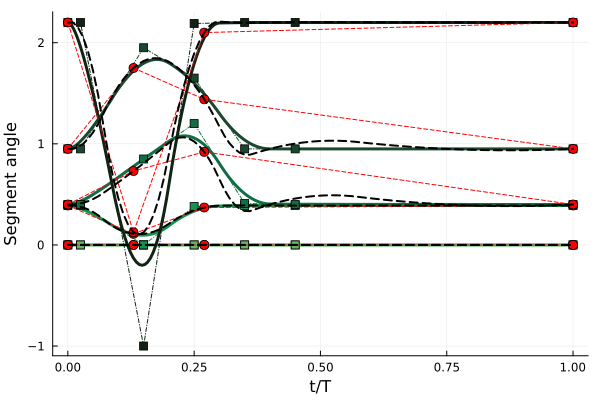

In [277]:
p = plot(dpi=200, xlabel="t/T", ylabel="Segment angle")

for i in 2:size(cps_thetas, 1)
    cps, pu = smoothShapeParams(i, cps_thetas, 0:0.01:1.0)
    plot!(pu[1, :], pu[2, :], label="", linewidth=3, color=color_range[i])
    plot!(cps[1, :], cps[2, :], linestyle=:dashdot, marker=:square, label="", color=color_range[i])
    plot!(vcat(timeVals, 1.0), vcat(thetas[i-1, :], thetas[i-1, 1]),
        linestyle=:dash, marker=:circle, label="", color=:red, markersize=5)
end

for i in 1:6
    filename = @sprintf("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_segment_%d_Costello2020.txt", i-1)
    refData = readdlm(filename)
    plot!(refData[:, 1], refData[:, 4], linewidth=2, color=:black, linestyle=:dash, label="")
end

plot!(show=true)

In [278]:
function getSegmentPosition(iSeg, tTarget, cps; NiterMax=100, tol=1e-6, printout=false)
    # For an arbitrary t/T value, need to either pre-compute the splines describing
    # the motion of each segment at the right time values or have an iterative routine
    # for matching the desired time.
    s0 = 0.
    s1 = 1.
    y = 0.
    
    for i in 1:1:NiterMax
        # Evaluate at the centre of the trust region.
        sx = (s0 + s1) / 2.
        
        # Pick control points from the array and make a spline
        cps_y = cps[[1, iSeg+1], :]
        t, y = old_evaluate_spline(cps_y, [sx])

        if printout
            println(i, " ", abs(t-tTarget), " ", t)
        end

        # Check if converge. Shrink the trust region if not.
        if abs(t-tTarget) < tol
            return y
        end
        if t > tTarget
            s1 = sx
        else
            s0 = sx
        end
    end
    
    # Return the best available approximation even though convergence has not been met.
    return y
end

iSeg = 2
getSegmentPosition(iSeg, 0.21, cps_halfThicknesses, printout=true)

1 0.03999999999999998 0.24999999999999997
2 0.09203125 0.11796875
3 0.02269531250000001 0.18730468749999998
4 0.008750000000000008 0.21875
5 0.006874999999999992 0.203125
6 0.00093749999999998 0.21093749999999997
7 0.0029687499999999922 0.20703125
8 0.00101562500000002 0.20898437499999997
9 3.9062500000019984e-5 0.20996093749999997
10 0.00044921874999998 0.21044921874999997
11 0.00020507812499998002 0.21020507812499997
12 8.300781249998002e-5 0.21008300781249997
13 2.1972656249980016e-5 0.21002197265624997
14 8.544921875019984e-6 0.20999145507812497
15 6.713867187480016e-6 0.21000671386718747
16 9.15527343769984e-7 0.20999908447265622


0.09281259842013243

In [279]:
function shapeForTime(t; s=0:0.01:1)
    # Get parameter values for this point in the cycle.
    # TODO have a list of spline objects and call the evaluation method instead.
    seg_theta = []
    seg_length = []
    seg_thickness = []
    for iSeg in 1:size(cps_thetas, 1)-1
        push!(seg_theta, getSegmentPosition(iSeg, t, cps_thetas))
        push!(seg_length, getSegmentPosition(iSeg, t, cps_lengths))
        push!(seg_thickness, getSegmentPosition(iSeg, t, cps_halfThicknesses))
            # old_evaluate_spline(hcat([tSplineCps, cps_thetas[i, :]]...)', [t])[2])
    end

    # Construct the control points from the params.
    cps_u = zeros(2, size(seg_length, 1))
    cps_l = zeros(2, size(seg_length, 1))

    xLast = [-seg_length[1]/2, -seg_thickness[1]]

    for i in 1:length(seg_thickness)
        xNew = rotatePoint(xLast + [seg_length[i], 0], xLast, -seg_theta[i])
        xMid = (xLast + xNew) / 2.0
        vTan = (xNew - xLast) / norm(xNew - xLast)
        vPer = [-vTan[2], vTan[1]]

        cps_u[:, i] = xMid + seg_thickness[i]*vPer
        cps_l[:, i] = xMid - seg_thickness[i]*vPer

        xLast = xNew
    end

    cps = hcat(cps_u, reverse(cps_l, dims=2))
    # if mirror
    #     cps = hcat(cps, reverse(cps[:, 1:end-1].*[-1.0, 1.0], dims=2))
    # end
    xy = old_evaluate_spline(cps, s)

    return xy, cps, hcat([seg_length, seg_thickness, seg_theta]...)
end

shapeForTime (generic function with 1 method)

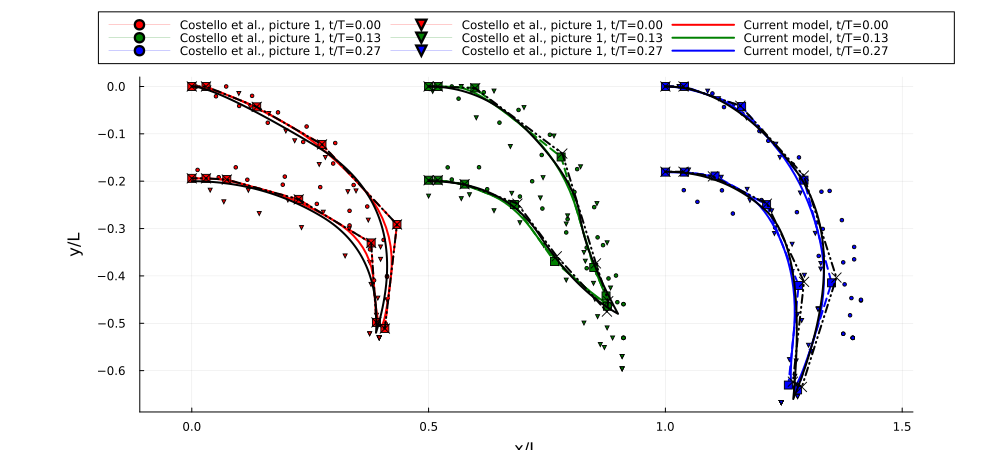

In [280]:
function shapeCostello(iCostello_a)
    x_ref_a = vcat([shapeData_Costello[iCostello_a][:, 1], shapeData_Costello[iCostello_a][:, 3]]...)
    y_ref_a = vcat([shapeData_Costello[iCostello_a][:, 2], shapeData_Costello[iCostello_a][:, 4]]...)
    x0_a = (findmax(x_ref_a)[1] + findmin(x_ref_a)[1]) / 2.0
    y0_a = findmax(y_ref_a)[1]
    return x_ref_a .- x0_a, y_ref_a .- y0_a
end

plot(xlabel="x/L", ylabel="y/L", aspect_ratio=:equal, size=(1000, 450))

# ===
xy, cps, segParams1 = shapeForTime(0.)
x_ref_a, y_ref_a = shapeCostello(1)
x_ref_b, y_ref_b = shapeCostello(4)

plot!(abs.(x_ref_a), y_ref_a, marker=:dot, linewidth=0, color=:red, markersize=2,
    label="Costello et al., picture 1, t/T=0.00")
plot!(abs.(x_ref_b), y_ref_b, marker=:v, linewidth=0, color=:red, markersize=2,
    label="Costello et al., picture 1, t/T=0.00")
plot!(xy[1, :], xy[2, :], linewidth=2, color=:red, label="Current model, t/T=0.00")
plot!(cps[1, :], cps[2, :], linewidth=2, color=:red, marker=:square, linestyle=:dash, markersize=4, label="")

shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot1.txt")
refCps = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothShapeCps_Costello2020_snapshot0.txt")
plot!(shape_Costello_regressed[:, 1], shape_Costello_regressed[:, 2], linewidth=2, color=:black, label="")
plot!(refCps[:, 1] .+ 0.0, refCps[:, 2], linewidth=2, marker=:x, linestyle=:dashdotdot, color=:black,
    markersize=5, label="")

# ===
xy, cps, segParams2 = shapeForTime(0.13)
x_ref_a, y_ref_a = shapeCostello(2)
x_ref_b, y_ref_b = shapeCostello(5)

plot!(abs.(x_ref_a) .+ 0.5, y_ref_a, marker=:dot, linewidth=0, color=:green, markersize=2,
    label="Costello et al., picture 1, t/T=0.13")
plot!(abs.(x_ref_b) .+ 0.5, y_ref_b, marker=:v, linewidth=0, color=:green, markersize=2,
    label="Costello et al., picture 1, t/T=0.13")
plot!(xy[1, :] .+ 0.5, xy[2, :], linewidth=2, color=:green, label="Current model, t/T=0.13")
plot!(cps[1, :] .+ 0.5, cps[2, :], linewidth=2, color=:green, marker=:square, linestyle=:dash, markersize=4, label="")

shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot2.txt")
refCps = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothShapeCps_Costello2020_snapshot1.txt")
plot!(shape_Costello_regressed[:, 1], shape_Costello_regressed[:, 2], linewidth=2, color=:black, label="")
plot!(refCps[:, 1] .+ 0.5, refCps[:, 2], linewidth=2, marker=:x, linestyle=:dashdotdot, color=:black,
    markersize=5, label="")

# ===
xy, cps, segParams3 = shapeForTime(0.27)
x_ref_a, y_ref_a = shapeCostello(4)
x_ref_b, y_ref_b = shapeCostello(6)

plot!(abs.(x_ref_a) .+ 1.0, y_ref_a, marker=:dot, linewidth=0, color=:blue, markersize=2,
    label="Costello et al., picture 1, t/T=0.27")
plot!(abs.(x_ref_b) .+ 1.0, y_ref_b, marker=:v, linewidth=0, color=:blue, markersize=2,
    label="Costello et al., picture 1, t/T=0.27")
plot!(xy[1, :] .+ 1.0, xy[2, :], linewidth=2, color=:blue, label="Current model, t/T=0.27")
plot!(cps[1, :] .+ 1.0, cps[2, :], linewidth=2, color=:blue, marker=:square, linestyle=:dash, markersize=4, label="")

shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot3.txt")
refCps = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothShapeCps_Costello2020_snapshot2.txt")
plot!(shape_Costello_regressed[:, 1], shape_Costello_regressed[:, 2], linewidth=2, color=:black, label="")
plot!(refCps[:, 1] .+ 1.0, refCps[:, 2], linewidth=2, marker=:x, linestyle=:dashdotdot, color=:black,
    markersize=5, label="")

plot!(legend=:outertop, legend_columns=3)

(6, 3)
(6, 3)


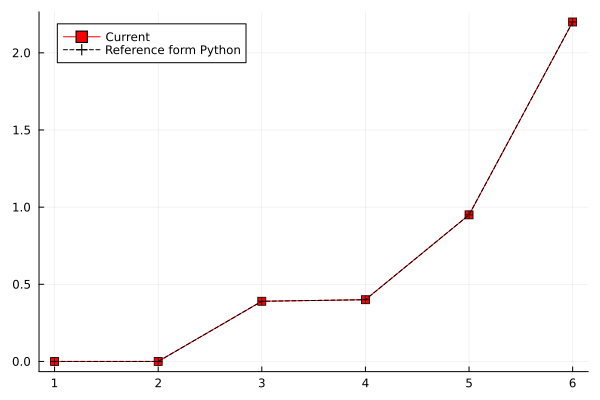

In [281]:
refParams = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_Costello2020_snapshot0.txt")
segParams = segParams1

# refParams = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_Costello2020_snapshot1.txt")
# segParams = segParams2

# refParams = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/smoothedShapeParams_Costello2020_snapshot2.txt")
# segParams = segParams3

println(size(segParams))
println(size(refParams))
i = 3
plot(segParams[:, i], color=:red, marker=:square, label="Current")
plot!(refParams[:, i], color=:black, linestyle=:dash, marker=:cross, label="Reference form Python")

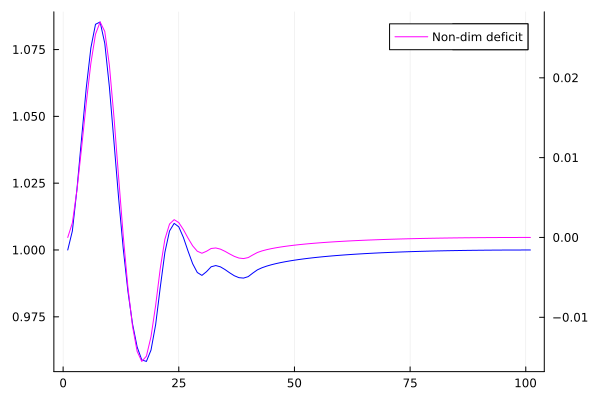

In [319]:
area = []
totalLength = []
for x in 0:0.01:1
    xy, cps, segParams = shapeForTime(x)
    push!(area, polyArea(xy))
    push!(totalLength, sum(segParams[:, 3]))
end
plot(area / area[1], color=:blue, label="Area")
# plot!(twinx(), totalLength, color=:red, label="Total length")
plot!(twinx(), (area ./ area[1] .- 1.) ./ totalLength, color=:magenta, label="Non-dim deficit")

[ Info: Saved animation to D:\_temp\jelly.gif


Plots.AnimatedGif("D:\\_temp\\jelly.gif")
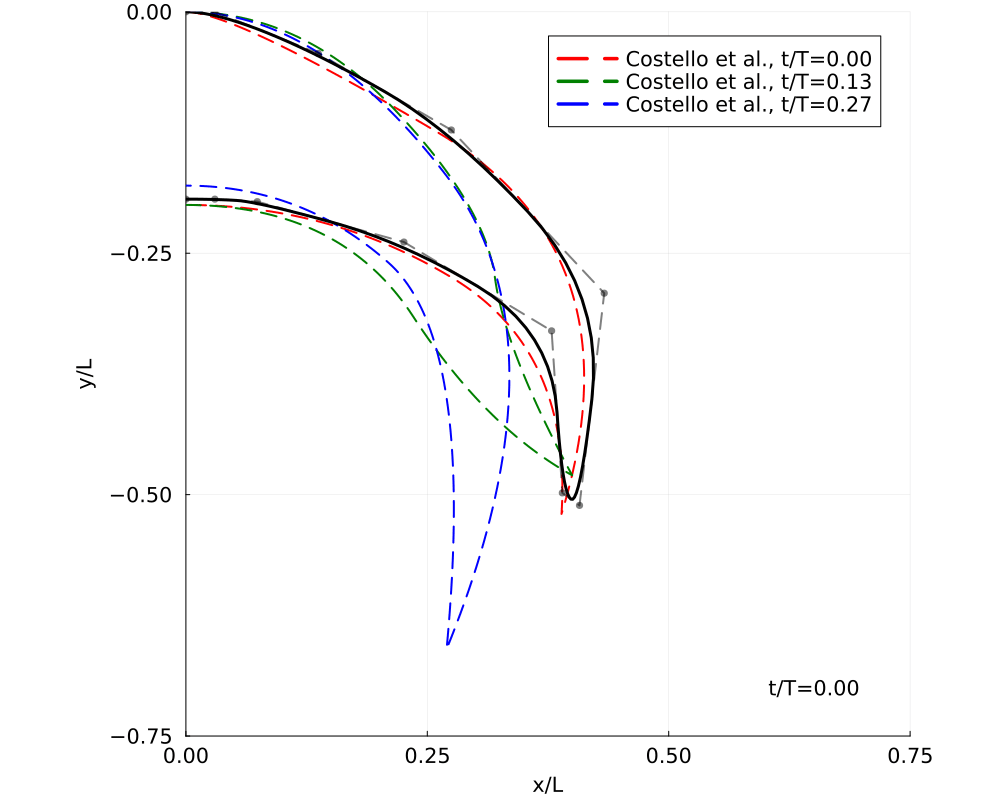

In [302]:
# Function to generate frames for the animation
function generate_frames()
    anim = Animation()
    for x in 0:0.01:1
        xy, cps, segParams = shapeForTime(x)
        fs = 14
        plot(xlabel="x/L", ylabel="y/L", aspect_ratio=:equal, xlims=(0, 0.75), ylims=(-0.75, 0), size=(1000, 800),
            xtickfontsize=fs, ytickfontsize=fs, xguidefontsize=fs, yguidefontsize=fs, legendfontsize=fs)
        
        shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot1.txt")
        plot!(shape_Costello_regressed[:, 1], shape_Costello_regressed[:, 2], linewidth=2, color=:red,
            linestyle=:dash, label="Costello et al., t/T=0.00")
        
        shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot2.txt")
        plot!(shape_Costello_regressed[:, 1].-0.5, shape_Costello_regressed[:, 2], linewidth=2, color=:green,
            linestyle=:dash, label="Costello et al., t/T=0.13")
        
        shape_Costello_regressed = readdlm("D:/git/JellyfishGiggles/dataset_01_medusae/shape_Costello2020_snapshot3.txt")
        plot!(shape_Costello_regressed[:, 1].-1.0, shape_Costello_regressed[:, 2], linewidth=2, color=:blue,
            linestyle=:dash, label="Costello et al., t/T=0.27")
        
        plot!(xy[1, :], xy[2, :], color=:black, linewidth=3, label="")
        plot!(cps[1, :], cps[2, :], linewidth=2, color=:black, marker=:circle, linestyle=:dash, markersize=4, alpha=0.5, label="")
        
        formatted_float = @sprintf("%.2f", x)
        annotate!(0.65, -0.7, text("t/T=$formatted_float", fs, :black))
        
        frame(anim)
    end
    return anim
end

# Generate frames
anim = generate_frames()

# Save the animation as a GIF
gif(anim, "D:/_temp/jelly.gif", fps=10)


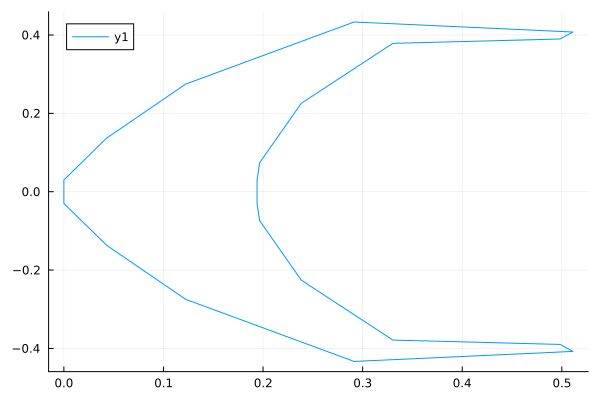

In [341]:
b = hcat(cps, reverse(cps[:, 1:end].*[-1.0, 1.0], dims=2))
a = b[[2, 1], :] .* [-1., 1.]
plot(a[1, :], a[2, :])

In [343]:
size(cps), size(a)

((2, 12), (2, 24))

In [282]:
#=

function profileFromParams(lengths, halfThickness, theta; s=0:0.01:1, mirror=false)
    """
        profileFromParams(lengths, halfThickness, theta; s=0:0.01:1)

    Calculate profile coordinates, control points, and area based on input parameters.

    Arguments
    - `lengths::Vector{Float64}`: Array of lengths.
    - `halfThickness::Vector{Float64}`: Array of half thicknesses.
    - `theta::Vector{Float64}`: Array of angles in radians.
    - `s::StepRangeLen{Float64, Base.TwicePrecision{Float64}, Base.TwicePrecision{Float64}}`: Parameter range for evaluation. Default is `0:0.01:1`.
    - `mirror::{Bool}`: whether or not to make a full profile, default is false.

    Returns
    - `Array{Float64, 2}`: Array of profile coordinates.
    - `Array{Float64, 2}`: Array of control points.
    - `Float64`: Calculated area.

    """
    cps_u = zeros(2, size(lengths, 1))
    cps_l = zeros(2, size(lengths, 1))

    xLast = [-lengths[1]/2, -halfThickness[1]]
    
    for i in 1:length(halfThickness)
        xNew = rotatePoint(xLast + [lengths[i], 0], xLast, -theta[i])
        xMid = (xLast + xNew) / 2.0
        vTan = (xNew - xLast) / norm(xNew - xLast)
        vPer = [-vTan[2], vTan[1]]

        cps_u[:, i] = xMid + halfThickness[i]*vPer
        cps_l[:, i] = xMid - halfThickness[i]*vPer
        
        xLast = xNew
    end

    cps = hcat(cps_u, reverse(cps_l, dims=2))
    if mirror
        cps = hcat(cps, reverse(cps[:, 1:end-1].*[-1.0, 1.0], dims=2))
    end
    xy = evaluate_spline(cps, s)
    area = polyArea(xy)
    
    return xy, cps, area
end

function thicknessTarget(x, Lfit, thkFit, thetaFit, aTarget=0.0644)
    """
        thicknessTarget(x, Lfit, thkFit, thetaFit)

    Calculate the absolute difference between the calculated area and a target area
    for a thickness increment x in range 0 and 1.

    Arguments
    - `x::Float64`: thickness increment.
    - `Lfit::Vector{Float64}`: List of segment lengths.
    - `thkFit::Vector{Float64}`: List of segment thicknesses
    - `thetaFit::Vector{Float64}`: List of segment angles
    - `aTarget::Float64`: target area, default is 0.0644 (from Costello 2020).

    Returns
    - `Float64`: Absolute difference between the calculated area and the target area.

    """

    dt = (x - 0.5) / 0.5 * 0.01
    xy1, cps1, area1 = profileFromParams(Lfit, thkFit .+ dt, thetaFit)
    return abs(area1 - aTarget)
end

function params_for_profile(tOverT, timeVals, lengths, halfThicknesses, thetas; aTarget=0.0644)
    """
        params_for_profile(tOverT, timeVals, lengths, halfThicknesses, thetas)

    Calculate parameters for profile control points at a non-dimensional time `tOverT`
    using smooth spline interpolation given source data at sparse time values.

    # Arguments
    - `tOverT::Float64`: Non-dimensional time value.
    - `timeVals::Vector{Float64}`: Array of time values.
    - `lengths::Matrix{Float64}`: Matrix of length values for each control point over time.
    - `halfThicknesses::Matrix{Float64}`: Matrix of half thickness values for each control point over time.
    - `thetas::Matrix{Float64}`: Matrix of angle values for each control point over time.
    - `aTarget::Float64`: target area for the profile, default is 0.0644 (from Costello 2020).
        Set to a negative value in order to disable optimisation. The area of the profile will then not
        be exactly the same for all t/T parameter values.

    # Returns
    - `Vector{Float64}`: Array of fitted length values for the profile at `tOverT`.
    - `Vector{Float64}`: Array of fitted half thickness values for the profile at `tOverT`.
    - `Vector{Float64}`: Array of fitted angle values for the profile at `tOverT`.

    """
    Lfit, thkFit, thetaFit = zeros(size(lengths, 1)), zeros(size(lengths, 1)), zeros(size(lengths, 1))
    for i in 1:length(Lfit)
        itp_l = interpolate(timeVals, lengths[i, :], SteffenMonotonicInterpolation())
        itp_t = interpolate(timeVals, halfThicknesses[i, :], SteffenMonotonicInterpolation())
        itp_a = interpolate(timeVals, thetas[i, :], SteffenMonotonicInterpolation())

        Lfit[i] = itp_l(tOverT)
        thkFit[i] = itp_t(tOverT)
        thetaFit[i] = itp_a(tOverT)
    end
    
    if aTarget > 0.0
        f(x) = thicknessTarget(x[1], Lfit, thkFit, thetaFit)
        result = optimize(f, [0.0], [1.0], [0.5])
        dThick = (result.minimizer[1] - 0.5)/0.5 * 0.01
        thkFit .+= dThick
    end

    return Lfit, thkFit, thetaFit
end
=#